<a href="https://colab.research.google.com/github/lfmartins/introduction-to-computational-mathematics/blob/main/15-usingsolve_ivp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using `solve_ivp`

Lesson Objectives:
- Learning how to use SciPy ODE Solvers in Jupyter Notebooks
- Systems of ODEs
- Stiffness
____

Today's goal is to learn how to use integrated ODE Solvers in Jupyter Notebooks. These ODE solvers are similar to those used many times in Matlab.

All information relating to this lesson can be found in https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html .

There are a few reasons for choosing integrated solvers. Many times, there is error tolerance control via adaptive time stepping. Other times they are coded in such a way to decrease the computing time associated withe solving the ODE. 

At its core, the `solve_ivp` function is used to generate a numerical solution to an initial value problem (IVP)

$$\frac{dy}{dt}=f(t,y),\qquad y(t_{0})=y_{0}$$

___

To solve an ODE in Jupyter with a library, you need to use a function from the SciPy library, known as `scipy.integrate.solve_ivp`. Examining the inputs of `solve_ivp`:

`solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)`

`fun`: the right-hand side of our ODE

`t_span`: the interval of your ODE

`y0`: the initial value (this can be a vector)

`method`: the numerical ODE method you are using, default is RK45 (we'll talk more about this)

`t_eval`: the time points that are stored in the computed solution. They must fall within the range of `t_span`. If nothing is set, then the points will be chosen by the solver

`dense_output`: when the resulting solutions has many points to output, it may be useful to store as an interpolating polynomial

`events`: (don't worry about this at the moment)

`vectorized` : if the right hand side is vectorized, this should be set to True. Default is False.

`options`: options associated with the ODE solver (we'll discuss this more)


____

The possible numerical ODE methods listed under `methods` are as follows:

`RK45`: Explicit RK method of order 5 (globally 4). This should be the first option.

`RK23`: Explicit RK method of order 3 (globally 2)

`DOP853`: Explicit RK method of order 8. Use for problems needing high precision.

`Radau`: Implicit RK method that is order 5.

`BDF`: Implicit multistep method of variable order.

`LSODA`: A method that automatically uses an Adams method for non-stiff problems and a BDF method for stiff problems.

At first try to run ‘RK45’. If it takes too many iterations, diverges, or fails, your problem is likely to be stiff and you should use ‘Radau’ or ‘BDF’. 

_____

The options listed under `options` are associated with the ODE solver. A few of the more relevant options are the following:

`first_step`: the initial step size

`max_step`: the max step size

`atol,rtol`: solver uses a local error estimate that ensures that the estimate is less than `atol + rtol * abs(y)`, where if the error estimate is above the threshold, a smaller step size is chosen.

____

Let's use this solver for a simple ODE

$$y'=-y,\qquad y(0)=1$$

using RK45

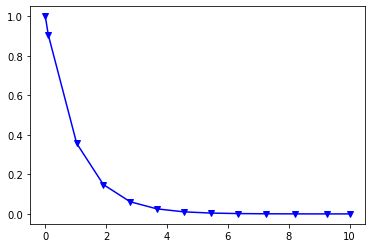

In [ ]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
def fun1(t,y):
    f=-1*y
    return f

sol=solve_ivp(fun1,[0,10],[1])
# print(sol)
# print(sol.t)
# print(sol.y)
plt.plot(sol.t,sol.y[0,:],'-vb')

Let's say we want more time points. Then we need to include `t_eval` in our solver (and also specify `RK45` as our method)

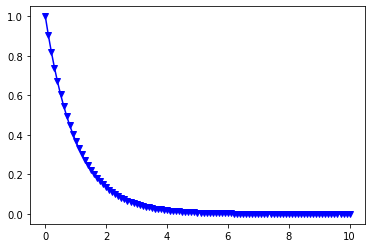

In [ ]:
teval=np.linspace(0,10,101)
sol=solve_ivp(fun1,[0,10],[1],'RK45',teval)
# print(sol)
plt.plot(sol.t,sol.y[0,:],'-vb')

If we want to run our ODE solver with multiple initial values, then we can do so with our initial conditions

In [ ]:

y0=[10,1,.1]
print(y0)
sol=solve_ivp(fun1,[0,10],y0,'RK45',teval)
# print(sol.y)
# plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:],sol.t,sol.y[2,:])

We can also set our error tolerances to different levels and our ODE solver will take an appropriate step size. Here we play with `rtol`:

In [ ]:
sol1=solve_ivp(fun1,[0,10],[1],'RK45',atol=.1)
# print(sol1.y)
sol2=solve_ivp(fun1,[0,10],[1],'RK45',atol=.01)
# print(sol2.y)
sol3=solve_ivp(fun1,[0,10],[1],'RK45',atol=1e-8)
# print(sol3.y)
# plt.plot(sol1.t,sol1.y[0,:],sol2.t,sol2.y[0,:],sol3.t,sol3.y[0,:])

### Exercises

We're going to revisit the previous exercises using `solve_ivp`. For these solutions, use the default `RK45` and the relative tolerance set to $10^{-4}$. Vary the relative tolerance and see how the solutions change.

1. Adjust ``fun`` for the function $f(t,y)=y-t^2+1$ and use Forward Euler code to find the approximation for the interval $[0,2]$ with $y(0)=0.5$. Compare the approximation with the solution $y=(t+1)^2-0.5e^t$.

2. Adjust ``fun`` for the function $f(t,y)=1+y/t$ and use Forward Euler code to find the approximation for the interval $[1,2]$ with $y(1)=2$. 
Compare the approximation with the solution $y=2t+t\log(t)$.

3. Adjust ``fun`` for the function $f(t,y)=\cos(2t)+\sin(2t)$ and use Forward Euler to find the approximation for the interval $[0,1]$ with $y(0)=1$. Compare the approximation with the solution $y=\frac{1}{2}\sin(2t)-\frac{1}{3}\cos(3t)+4/3$.

# Systems of ODEs
Let's investigate how to approach systems of ODEs. 

One of the most famous ODEs is the Lotka-Volterra model for Predator-Prey interactions. They were developed in the 1920s in parallel by two mathematicians, Alfred Lotka (USA) and Vito Volterra (Italy).

Let $X$ represent the population of prey. Prey grow exponentially when left to their own devices (assuming infinite carrying capacity in the environment), so $X'=a X$.

If there are predators present, whose population is represented by $Y$, then the predators cause the prey decline at a rate that is jointly proportional to the population of predators and prey. If no few predators are present, then they cause less of a decline to the prey population. One of our equations becomes 
$$X'= a X - b XY$$

The predators grow at a rate that is also jointly proportional to the number of predators and prey, so $Y'=c XY$. Predators compete with each other, so the more predators present, the more a population declines. Our predator equation then becomes
$$Y'=c XY - d Y$$

Our set of equations are then

$$X'=aX-b XY,\qquad X(0)=X_0$$
$$Y'=c XY - dY,\qquad Y(0)=Y_0$$

Let's explore how to model this with our solver. Note we use two variables, `x,y` stored in a vector `z`. Setting up the function:


In [ ]:
def LVEqn(t,Z):
    a=1.5
    b=1
    c=.1
    d=1
    x,y=Z
    f1=a*x-b*x*y
    f2=c*x*y-d*y
    return [f1,f2]

Note that our solver uses multiple arguments in the right hand side.

42.35056550806467


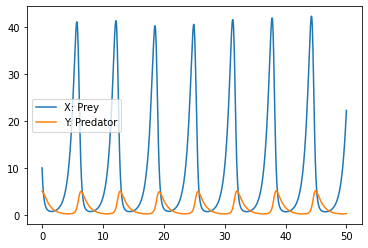

In [ ]:
teval=np.linspace(0,50,1000)
sol = solve_ivp(LVEqn, [0, 50], [10, 5],'RK45',teval,atol=1e-3)

plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:])
plt.legend(['X: Prey','Y: Predator'])

print(np.max(sol.y[0,:]))

Notice that some of our solutions don't seem that smooth. One reason for this is that the ODE is stiff (rapid changes occur) and can lead to stability issues with our solution. 

Certain solvers have been formulated to deal with these issues. Try `LSODA`.

In [ ]:
sol = solve_ivp(LVEqn, [0, 50], [10, 5],'LSODA',atol=1e-6)

plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:])
plt.legend(['X: Prey','Y: Predator'])

Before continuing try playing around with parameters of the equation. Note how the solution changes. We can also play around with a phase plot with respect to $X$ and $Y$.

In [ ]:
plt.plot(sol.y[0,:],sol.y[1,:])
plt.xlabel('X Prey')
plt.ylabel('Y Predator')


For comparison, here is an image of hare and lynx populations (counted by the number of furs collected by the Hudson Bay Company) over time:

In [ ]:
from IPython.display import Image
Image(filename='hare_lynx_population.jpg') 

### Exercises 
1. The following systems of ODEs, formulated by Lorenz, represent a crude model of atmospheric circulation:
$$x'=\sigma(y-x)$$
$$y'=rx-y-x z$$
$$z'=x y - b z$$
where $x$ is proportional to the rate of convection, $y$ to the horizontal temperature variation, and z to the vertical temperature variation. Taking $\sigma=10$, $b=8/3$, $r=28$ and initial values $x(0)=z(0)=0$ and $y(0)=1$. Integrate the ODE from $t=0$ to $t=100$. Plot $x$, $y$, and $z$ with respect to $t$ on one graph. Use RK45 and set `rtol=1e-7`.

2. Plot three additional graphs of the trajectories $(x,y)$, $(x,z)$, and $(y,z)$. Perturb the initial values by a tiny amount and see how much difference this makes in the solution at $t=100$.

2. Use matplotlib to plot $x$, $y$, and $z$ on the same graph. Adjust the following snippet of code that plots a graph in 3D.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline)